In [65]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
%matplotlib inline


In [66]:
# import the farmingham data
farmingham_data = pd.read_csv("output_data/framingham.csv")
# identify any null values
farmingham_data.count()
# identify the data type
farmingham_data.dtypes


ID                   int64
male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [67]:
# drop any null valules - lets not drop the null values and fill it in with mean
farmingham_data = farmingham_data.dropna(how="any")
print(farmingham_data.count())


ID                 3658
male               3658
age                3658
education          3658
currentSmoker      3658
cigsPerDay         3658
BPMeds             3658
prevalentStroke    3658
prevalentHyp       3658
diabetes           3658
totChol            3658
sysBP              3658
diaBP              3658
BMI                3658
heartRate          3658
glucose            3658
TenYearCHD         3658
dtype: int64


In [68]:


#  convert the someof the floats to integer
farmingham_data.loc[:, "BPMeds"] = farmingham_data.loc[:, "BPMeds"].astype("int")
farmingham_data.loc[:, "education"] = farmingham_data.loc[:, "education"].astype("int")
farmingham_data.loc[:, "cigsPerDay"] = farmingham_data.loc[:, "cigsPerDay"].astype("int")
farmingham_data.loc[:, "totChol"] = farmingham_data.loc[:, "totChol"].astype("int")
farmingham_data.loc[:, "sysBP"] = farmingham_data.loc[:, "sysBP"].astype("int")
farmingham_data.loc[:, "diaBP"] = farmingham_data.loc[:, "diaBP"].astype("int")
farmingham_data.loc[:, "heartRate"] = farmingham_data.loc[:, "heartRate"].astype("int")
farmingham_data.dtypes


ID                   int64
male                 int64
age                  int64
education            int32
currentSmoker        int64
cigsPerDay           int32
BPMeds               int32
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol              int32
sysBP                int32
diaBP                int32
BMI                float64
heartRate            int32
glucose            float64
TenYearCHD           int64
dtype: object

In [160]:
# rename the column name 'male' to 'Gender' and replace 0,1 to female and male
# replace Diabetes: from 0,1 to negative and positive
# replace TenYearCHD: from 0,1 to negative and positive
# Renamed Column headers
# replaced'male':0 = Female; 1 = Male=Gender

clean_df = farmingham_data.rename(columns = {"male": "Gender","age": "Age","currentSmoker":"Current-Smoker",
                                           "cigsPerDay":"Cigarettes-Per-Day","education":"Education",
                                            "prevalentStroke":"Prevalent-Stroke","prevalentHyp":"Prevalent-Hyp",
                                           "diabetes":"Diabetes","totChol":"Total-Cholesterol",
                                           "sysBP":"Systolic-Blood-Pressure","BPMeds":"Blood-Pressure-Medication","diaBP":"Diastolic-Blood-Pressure",
                                           "heartRate":"Heart-Rate","glucose":"Glucose","TenYearCHD":"Ten-Year-CHD"})
clean_df["Gender"]= clean_df["Gender"].replace(1, "Male")
clean_df["Gender"]= clean_df["Gender"].replace(0, "Female")
clean_df["Ten-Year-CHD"]= clean_df["Ten-Year-CHD"].replace(0, "negative")
clean_df["Ten-Year-CHD"]= clean_df["Ten-Year-CHD"].replace(1, "positive")
clean_df["Diabetes"]= clean_df["Diabetes"].replace(0, "No")
clean_df["Diabetes"]= clean_df["Diabetes"].replace(1, "Yes")
clean_df["Education"]= clean_df["Education"].replace(1, "Some High School")
clean_df["Education"]= clean_df["Education"].replace(2, "High School or GED")
clean_df["Education"]= clean_df["Education"].replace(3, "Some college or Vocational School")
clean_df["Education"]= clean_df["Education"].replace(4, "College")
clean_df["Prevalent-Stroke"]= clean_df["Prevalent-Stroke"].replace(0, "Never had a stroke")
clean_df["Prevalent-Stroke"]= clean_df["Prevalent-Stroke"].replace(1, "Has had a stroke")
clean_df["Current-Smoker"]= clean_df["Current-Smoker"].replace(0, "No")
clean_df["Current-Smoker"]= clean_df["Current-Smoker"].replace(1, "Yes")


clean_df.count()
# find any duplicated data - No duplicates found
clean_df.duplicated()
# Describe the data
clean_df.describe()
clean_df.to_csv("farmingham_study.csv", index = False)



In [138]:
clean_df.head(-1)

,ID,Gender,Age,Education,Current-Smoker,Cigarettes-Per-Day,Blood-Pressure-Medication,Prevalent-Stroke,Prevalent-Hyp,Diabetes,Total-Cholesterol,Systolic-Blood-Pressure,Diastolic-Blood-Pressure,BMI,Heart-Rate,Glucose,Ten-Year-CHD
0,1,Male,39,College,No,0,0,Never had a stroke,0,No,195,106,70,26.97,80,77.0,negative
1,2,Female,46,High School or GED,No,0,0,Never had a stroke,0,No,250,121,81,28.73,95,76.0,negative
2,3,Male,48,Some High School,Yes,20,0,Never had a stroke,0,No,245,127,80,25.34,75,70.0,negative
3,4,Female,61,Some college or Vocational School,Yes,30,0,Never had a stroke,1,No,225,150,95,28.58,65,103.0,positive
4,5,Female,46,Some college or Vocational School,Yes,23,0,Never had a stroke,0,No,285,130,84,23.10,85,85.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,4233,Male,68,Some High School,No,0,0,Never had a stroke,1,No,176,168,97,23.14,60,79.0,positive
4233,4234,Male,50,Some High School,Yes,1,0,Never had a stroke,1,No,313,179,92,25.97,66,86.0,positive
4234,4235,Male,51,Some college or Vocational School,Yes,43,0,Never had a stroke,0,No,207,126,80,19.71,65,68.0,negative
4237,4238,Female,52,High School or GED,No,0,0,Never had a stroke,0,No,269,133,83,21.47,80,107.0,negative


#### 1. Find correlation between all the health conditions from the data sets.
#### 2. Identify the outliers from the correlations
#### 3. Graph Gender VS 10 year CHD
#### 4. Graph Education impact on 10 year CHD
#### 5. Graph smokers per day VS 10 year CHD
#### 6. Graph each outliers VS 10 year CHD
#### 7. Graph each outliers that are out of normal range and and plot it VS 10 year CHD
#### 8. Calculate each outliers that are out of normal range and show the percentage of population developed CHD
#### 9. Analyze step 8 to see the patterned of the percentage of population developed CHD in 10 years.
#### 10. Conclusion - If you give me your actual number for each outliers, i can maybe predict percentage of you developing CHD in 10 years.

Text(0.5, 1.0, 'Correlation between different variables of the Dataset')

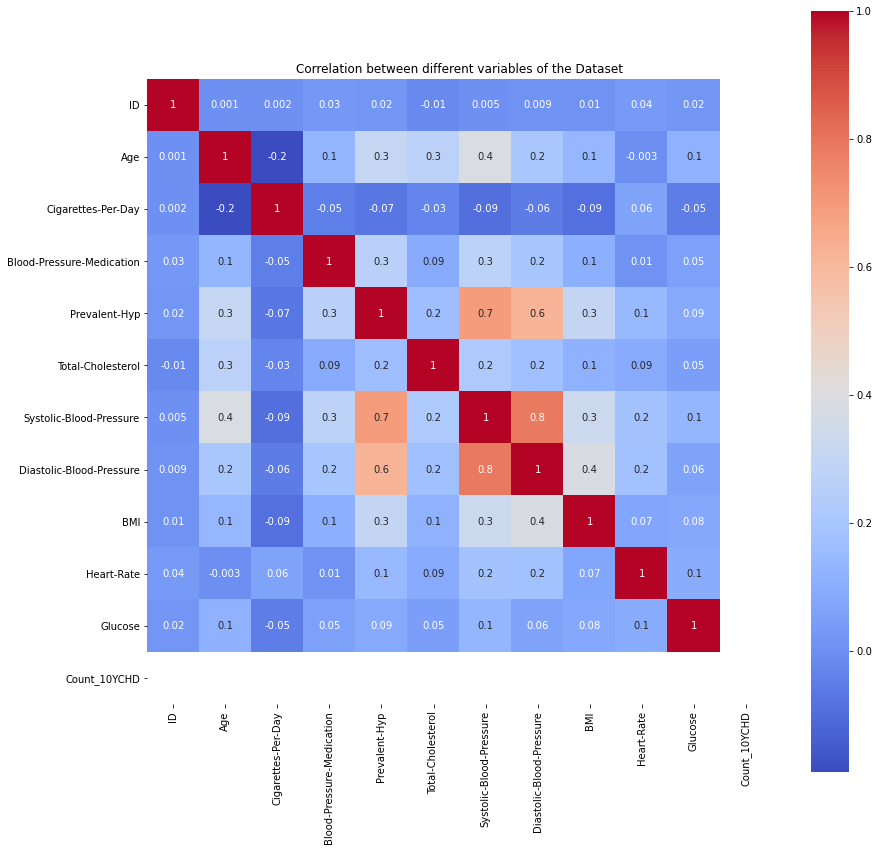

In [270]:
## Checking the correlation between output and input fields through a heatmap by the help of correlation function
correlation = clean_df.corr()
plt.figure(figsize=(14,14))
g = sns.heatmap(correlation, vmax=1, square=True,cmap='coolwarm',annot= True,xticklabels=True,yticklabels=True, fmt='.1g')
g.set_yticklabels(g.get_yticklabels(), rotation =0)
g.set_xticklabels(g.get_yticklabels(), rotation =90)
plt.title('Correlation between different variables of the Dataset')



#### Obervation: Currentsmoker & Cigsperday has strong correlations. PrevalentHyp vs SysBP/diaBP,  Glucos vs Diabetes, and sysBP & diaBP also have Positive correlations.

In [272]:
#  describe the data
clean_df.describe()

,ID,Age,Cigarettes-Per-Day,Blood-Pressure-Medication,Prevalent-Hyp,Total-Cholesterol,Systolic-Blood-Pressure,Diastolic-Blood-Pressure,BMI,Heart-Rate,Glucose,Count_10YCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.0
mean,2124.551941,49.551941,9.025424,0.030344,0.311646,236.847731,132.276381,82.839803,25.782802,75.730727,81.852925,1.0
std,1230.833763,8.562029,11.921590,0.171557,0.463229,44.097681,22.089816,11.980890,4.065601,11.981525,23.904164,0.0
min,1.000000,32.000000,0.000000,0.000000,0.000000,113.000000,83.000000,48.000000,15.540000,44.000000,40.000000,1.0
25%,1052.250000,42.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,1.0
50%,2141.500000,49.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,1.0
75%,3201.750000,56.000000,20.000000,0.000000,1.000000,263.000000,143.750000,90.000000,28.037500,82.000000,87.000000,1.0
max,4240.000000,70.000000,70.000000,1.000000,1.000000,600.000000,295.000000,142.000000,56.800000,143.000000,394.000000,1.0


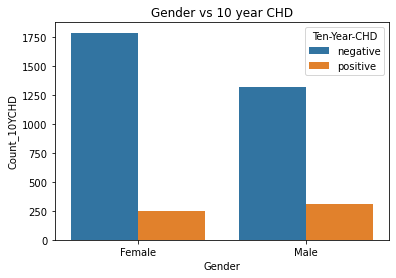

In [273]:
#  Plot CHD vs gender
clean_df['Count_10YCHD'] = 1
# create pivot table to count how many female and male are TenYearCHD positive and negative and graph it
gender_pv_df = clean_df.pivot_table('Count_10YCHD', ['Gender', 'Ten-Year-CHD'], aggfunc="sum").reset_index()
# plot the bar graph to show probabilities by Gender
gender_bar = sns.barplot(x="Gender", y="Count_10YCHD", hue="Ten-Year-CHD", data=gender_pv_df)
gender_bar.set_title('Gender vs 10 year CHD')
plt.setp(education_bar.get_xticklabels(), rotation=60)
legend = gender_bar.get_legend()
legend.set_bbox_to_anchor((1, 1))


#### Observation: Approximatey 12.29% of women and 18.92% of men are positive for CHD.


In [225]:
# 12.29% of female population has developed CHD in 10 years
# 18.92% of male population has developed CHD in 10 years
gender = clean_df.loc[:, ["Gender" , "Ten-Year-CHD",]]
male_no = gender.loc[gender["Gender"] == "Male"]
male_positive = male_no.loc[male_no["Ten-Year-CHD"] == "positive"]
female_no = gender.loc[gender["Gender"] == "Female"]
female_positive = female_no.loc[female_no["Ten-Year-CHD"] == "positive"]
positive_male = (male_positive.count()/male_no.count())*100
positive_female = (female_positive.count()/female_no.count())*100
positive_male

Gender          18.915588
Ten-Year-CHD    18.915588
dtype: float64

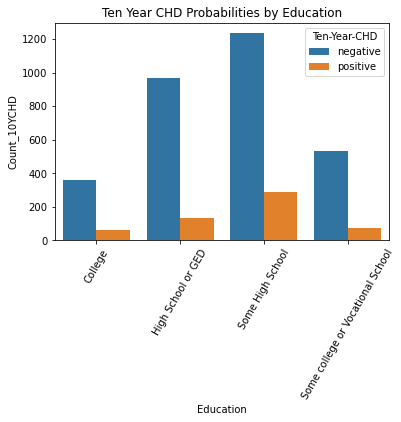

In [169]:
# let's check if education is relevant - do step 53 and 54 to create pivot table and graph it.
# create pivot table to show education vs Ten Year CHD in the dataset

education_pv_df = clean_df.pivot_table('Count_10YCHD', ['Education', 'Ten-Year-CHD'], aggfunc="sum").reset_index()
# plot the bar graph to show probabilities by Education - add % of people had lower education
education_bar = sns.barplot(x="Education", y="Count_10YCHD", hue="Ten-Year-CHD", data=education_pv_df)
education_bar.set_title('Ten Year CHD Probabilities by Education')
plt.setp(education_bar.get_xticklabels(), rotation=60)
legend = education_bar.get_legend()
legend.set_bbox_to_anchor((1, 1))

#### Observation: 1.64% of college education developed CHD, 2% of some college education developed CHD, 3.58% of High school or GED education  developed  CHD, and 7.8% of some high school developed CHD. 

In [274]:
education = clean_df.loc[:, ["Education" , "Ten-Year-CHD",]]
college_no = education.loc[education["Education"] == "College"]
college_positive = college_no.loc[college_no["Ten-Year-CHD"] == "positive"]
some_college_no = education.loc[education["Education"] == "Some college or Vocational School"]
somecollege_positive = some_college_no.loc[some_college_no["Ten-Year-CHD"] == "positive"]
High_GEDNo = education.loc[education["Education"] == "High School or GED"]
High_GEDNo_positive = High_GEDNo.loc[High_GEDNo["Ten-Year-CHD"] == "positive"]
somehisch_no = education.loc[education["Education"] == "Some High School"]
somehischo_positive = somehisch_no.loc[somehisch_no["Ten-Year-CHD"] == "positive"]
college_positive_per = (college_positive.count()/education.count())*100
somecollege_positive_per = (somecollege_positive.count()/education.count())*100
High_GEDNo_positive_per = (High_GEDNo_positive.count()/education.count())*100
somehischo_positive_per = (somehischo_positive.count()/education.count())*100


In [256]:
somehischo_positive_per

Education       7.955167
Ten-Year-CHD    7.955167
dtype: float64

In [275]:
# let's check which age group and gender smoke more.
# to do this, we need to create the agegroup range bins.follow steps 53 and 54 again and graph it
clean_df['Age'].unique()
# lets set the Ages range from max age 32 to 70 to create groups
clean_df['AgeGroup'] = pd.cut(x=clean_df['Age'], bins = [30 , 39, 49, 59, 70],
                              labels=['30-39 years', '40-49 years', '50-59 years', '60-70years'])
clean_df.head()


,ID,Gender,Age,Education,Current-Smoker,Cigarettes-Per-Day,Blood-Pressure-Medication,Prevalent-Stroke,Prevalent-Hyp,Diabetes,Total-Cholesterol,Systolic-Blood-Pressure,Diastolic-Blood-Pressure,BMI,Heart-Rate,Glucose,Ten-Year-CHD,Count_10YCHD,AgeGroup
0,1,Male,39,College,No,0,0,Never had a stroke,0,No,195,106,70,26.97,80,77.0,negative,1,30-39 years
1,2,Female,46,High School or GED,No,0,0,Never had a stroke,0,No,250,121,81,28.73,95,76.0,negative,1,40-49 years
2,3,Male,48,Some High School,Yes,20,0,Never had a stroke,0,No,245,127,80,25.34,75,70.0,negative,1,40-49 years
3,4,Female,61,Some college or Vocational School,Yes,30,0,Never had a stroke,1,No,225,150,95,28.58,65,103.0,positive,1,60-70years
4,5,Female,46,Some college or Vocational School,Yes,23,0,Never had a stroke,0,No,285,130,84,23.10,85,85.0,negative,1,40-49 years


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

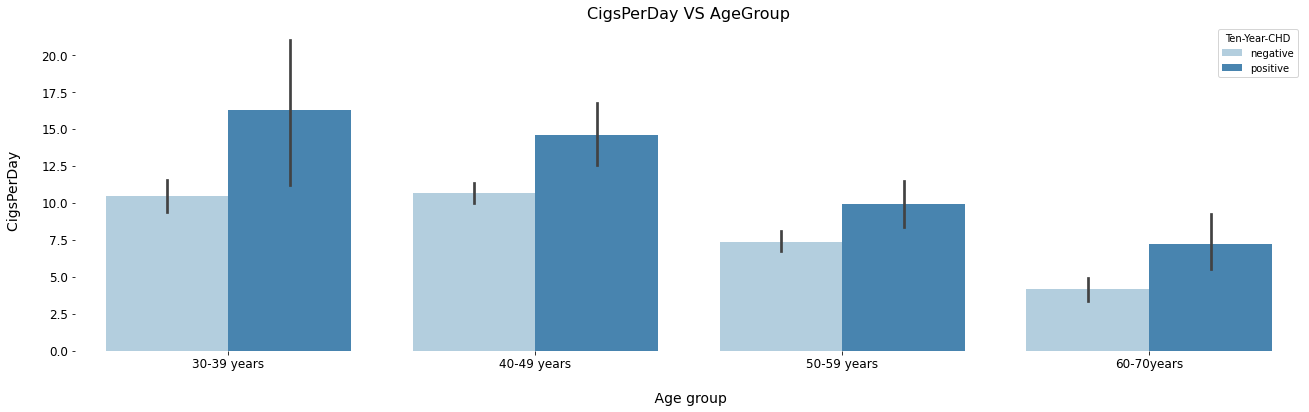

In [278]:
# create pivot table to show smokers vs Ten-Year-CHD
plt.figure(figsize=(22,6))
smoker_bar = sns.barplot(x="AgeGroup", y="Cigarettes-Per-Day", hue="Ten-Year-CHD", data=clean_df, palette = "Blues")
plt.box(False)
plt.title('CigsPerDay VS AgeGroup', fontsize=16)
plt.xlabel('\n Age group', fontsize=14)
plt.ylabel('CigsPerDay \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

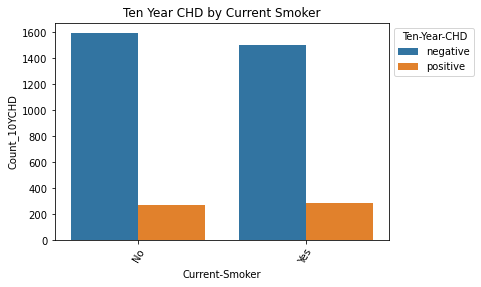

In [304]:
# show smokers by gender developing to years CHD
smokers_pv_df = clean_df.pivot_table('Count_10YCHD', ['Current-Smoker', 'Ten-Year-CHD'], aggfunc="sum").reset_index()
smokers_pv_df = clean_df.pivot_table('Count_10YCHD', ['Current-Smoker', 'Ten-Year-CHD'], aggfunc="sum").reset_index()
smoker_bar = sns.barplot(x="Current-Smoker", y="Count_10YCHD", hue="Ten-Year-CHD", data=smokers_pv_df)
smoker_bar.set_title('Ten Year CHD by Current Smoker')
plt.setp(smoker_bar.get_xticklabels(), rotation=60)
legend = smoker_bar.get_legend()
legend.set_bbox_to_anchor((1, 1))

#### Observation: Apporximatley 7.79% patients smoked. About 15.93% people who smoked were positive for CHD, 84.07% people who smoked were negative for CHD. Also 7.44% people who did not smoke but were positive for CHD. 


In [308]:
# Calculate what percentage of smoked and developed CHD in the age group
# Total smokers:7.79% patient smoked
tot_smoker = clean_df.loc[:, ["Current-Smoker" , "Ten-Year-CHD",]]
tot_smoker_yes = tot_smoker.loc[tot_smoker["Current-Smoker"] == "Yes"]
tot_smoker_per = (tot_smoker_positive.count()/tot_smoker.count())*100
# smoker percentage 15.93% were positive for CHD
smoker = clean_df.loc[:, ["Current-Smoker" , "Ten-Year-CHD",]]
smoker_yes = smoker.loc[smoker["Current-Smoker"] == "Yes"]
smoker_positive = smoker_yes.loc[smoker_yes["Ten-Year-CHD"] == "positive"]
smoker_percent = (smoker_positive.count()/smoker_yes.count())*100
# 85.45% patient who smoked were negative for CHD
smoker_yes_neg = smoker.loc[smoker["Current-Smoker"] == "Yes"]
smoker_CHD_neg = smoker_yes_neg.loc[smoker_yes_neg["Ten-Year-CHD"] == "negative"]
smoker_neg_percent = (smoker_CHD_neg.count()/smoker_yes_neg.count())*100
# 7.44 % did not smoke but they were positive for CHD
no_smoker = smoker.loc[smoker["Current-Smoker"] == "No"]
no_smoker_positive = no_smoker.loc[no_smoker["Ten-Year-CHD"] == "positive"]
no_smoker_positive_per = (no_smoker_positive.count()/smoker.count())*100


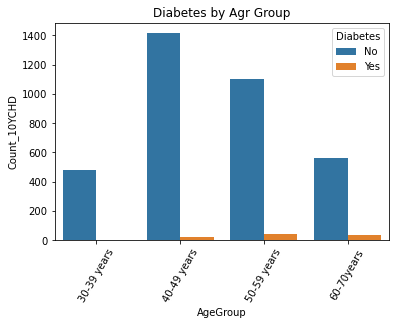

In [310]:
# let's check relationship between Diabetes in the incidence of heart disease.
# show Diabetes vs Ten Year CHD
diabetes_pv_df = clean_df.pivot_table('Count_10YCHD', ['AgeGroup', 'Diabetes'], aggfunc="sum").reset_index()
# plot the bar graph 
diabetes_bar = sns.barplot(x="AgeGroup", y="Count_10YCHD", hue="Diabetes", data=diabetes_pv_df)
diabetes_bar.set_title('Diabetes by Agr Group')
plt.setp(diabetes_bar.get_xticklabels(), rotation=60)
legend = diabetes_bar.get_legend()
legend.set_bbox_to_anchor((1, 1))


#### Observation: Approximatley .96% patients were positive for CHD who has Diabetes. About 14.27% people who had diabetes did not developed CHD.

In [303]:
# show percentage of people who had Diabetes and they were positive for CHD
diabetes = clean_df.loc[:, ["Diabetes" , "Ten-Year-CHD",]]
diabetes_yes = diabetes.loc[diabetes["Diabetes"] == "Yes"]
diabetes_positive = diabetes_yes.loc[diabetes_yes["Ten-Year-CHD"] == "positive"]
diabetes_positive_per = (diabetes_positive.count()/diabetes.count())*100
# show percentage of people who did not have Diabetes and they were positive for CHD
no_diabetes = diabetes.loc[diabetes["Diabetes"] == "No"]
no_diabetes_positive = no_diabetes.loc[no_diabetes["Ten-Year-CHD"] == "positive"]
no_diabetes_positive_per = (no_diabetes_positive.count()/diabetes.count())*100


C:\Users\patel\anaconda3\lib\site-packages\seaborn\distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Prevalent-Hyp and Probabilitiy of CHD')

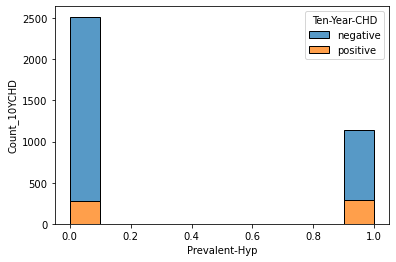

In [147]:
# show Prevalent-Hyp in total dataset against CHD
hyp_pv_df = clean_df.pivot_table('Count_10YCHD', ['Prevalent-Hyp', 'Ten-Year-CHD'], aggfunc="sum").reset_index()
hyp_bar = sns.histplot(hyp_pv_df, x="Prevalent-Hyp", weights="Count_10YCHD", hue="Ten-Year-CHD", multiple='stack')
hyp_bar.set_ylabel('Count_10YCHD')
legend = hyp_bar.get_legend()
legend.set_bbox_to_anchor((1, 1))
gender_bar.set_title('Prevalent-Hyp and Probabilitiy of CHD')


Text(0.5, 1.0, 'Total Cholesterol by age group')

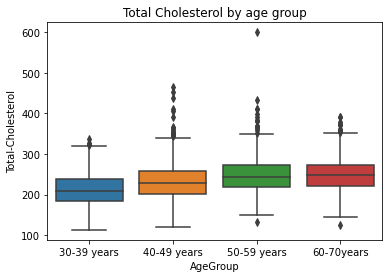

In [325]:
# same plot as cell 177
chol_plot = sns.boxplot(x="AgeGroup", y="Total-Cholesterol", data=clean_df)
chol_plot.set_title('Total Cholesterol by age group')

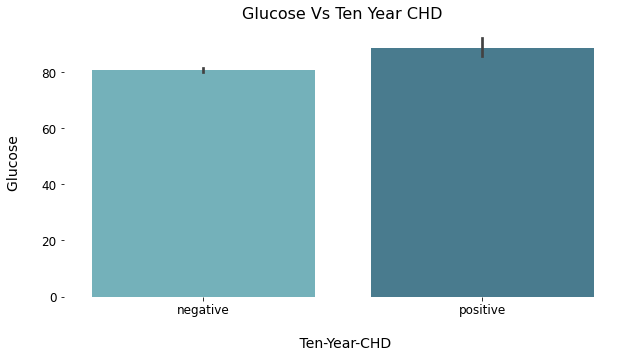

In [316]:
# compare Glucose to CHD
# show Glucose in total dataset against CHD
# visualizing feature selection
plt.figure(figsize=(10,5))
glucose_bar = sns.barplot(x= clean_df['Ten-Year-CHD'], y= clean_df['Glucose'], data=clean_df, palette = "GnBu_d")
plt.box(False)
plt.title('Glucose Vs Ten Year CHD', fontsize=16)
plt.xlabel('\n Ten-Year-CHD', fontsize=14)
plt.ylabel('Glucose \n', fontsize=14)
legend = glucose_bar.get_legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(22,6))
glucose = sns.barplot(x="Glucose", y="", hue="Ten-Year-CHD", data=clean_df, palette = "Blues")
plt.box(False)
plt.title('CigsPerDay VS AgeGroup', fontsize=16)
plt.xlabel('\n Age group', fontsize=14)
plt.ylabel('CigsPerDay \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

Text(0.5, 1.0, 'Target Class Count')

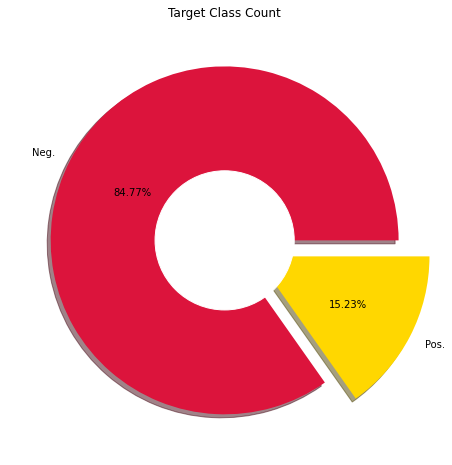

In [314]:
# show what percentage of population were positive for CHD
plt.figure(figsize=(8,8))
plt.pie(clean_df['Ten-Year-CHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

C:\Users\patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


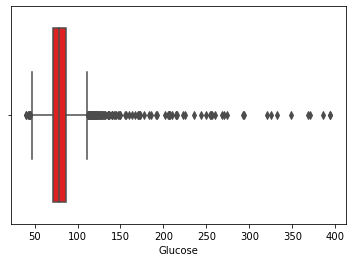

In [150]:
# Check for candidates with Glucose >300 (considered the Glucose factor as an outlier) 
#### note for the group: I uset boxplot!
sns.boxplot(clean_df.Glucose,color='red')
Outlier_sysBP = clean_df[(clean_df['Glucose'] > 300)] 
# calculate what percentage of population has Glucose level of 300 and they developed CHD in 10 years


C:\Users\patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


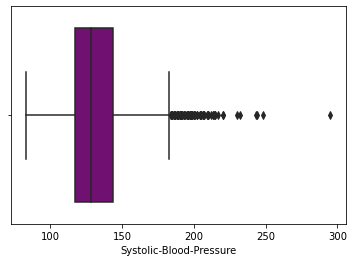

In [158]:
# Look for candidates with sysBP higher than 220 (BP>220 is considered as an outlier)
sns.boxplot(clean_df['Systolic-Blood-Pressure'],color='purple')
Outlier_sysBP = clean_df[(clean_df['Systolic-Blood-Pressure'] > 220)] 


#### Calculate what percentage of population has high HPY and were positive for CHD

Text(0.5, 1.0, 'Heart Rate by age group')

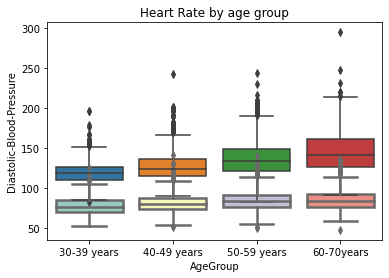

In [319]:
# plot Blood Pressure by age group
bprate_plot1 = sns.boxplot(x="AgeGroup", y="Systolic-Blood-Pressure",data=clean_df)
bprate_plot2 = sns.boxplot(x="AgeGroup", y="Diastolic-Blood-Pressure",data=clean_df,palette="Set3",linewidth=2.5)
bprate_plot1.set_title('Heart Rate by age group')



Text(0.5, 1.0, 'Heart Rate by age group')

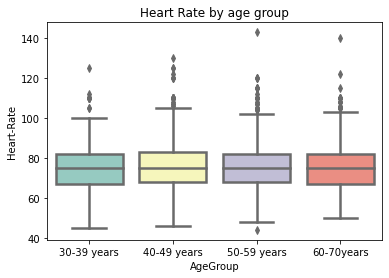

In [324]:
# plot Heart rate by age group
heart_plot = sns.boxplot(x="AgeGroup", y="Heart-Rate",data=clean_df,palette="Set3",linewidth=2.5)
heart_plot.set_title('Heart Rate by age group')


Text(0.5, 1.0, 'Total Glucose by age group')

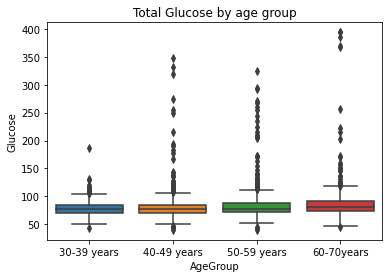

In [321]:

# plot Glucose by age group
glucose_plot = sns.boxplot(x="AgeGroup", y="Glucose", data=clean_df)
glucose_plot.set_title('Total Glucose by age group')

Text(0.5, 1.0, 'Total BMI by age group')

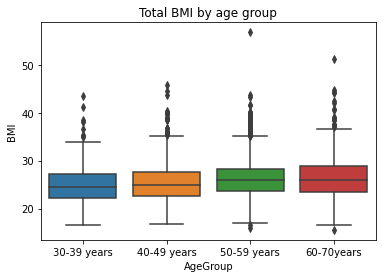

In [323]:
# plot BMI by age group
bmi_plot = sns.boxplot(x="AgeGroup", y="BMI", data=clean_df)
bmi_plot.set_title('Total BMI by age group')